In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data_dir = os.path.join("../data", "raw")
train = pd.read_csv(os.path.join(data_dir, "train.csv"))
test = pd.read_csv(os.path.join(data_dir, "test.csv"))
sub = pd.read_csv(os.path.join(data_dir, "submission.csv"))

In [46]:
train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [47]:
test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465,Turbine_158


In [48]:
sub.head()

,Target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


# Data Shape Analysis

In [49]:
print(f"number of rows in train: {train.shape[0]}")
print(f"number of rows in test: {test.shape[0]}")
print(f"number of columns in train: {train.shape[1]}")
print(f"number of columns in test: {test.shape[1]}")

number of rows in train: 909604
number of rows in test: 303202
number of columns in train: 16
number of columns in test: 14


# Null Analysis

In [50]:
print(train.isna().sum())

timestamp                                 0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64


So there is no null values in the dataset. This is good news.

# Univariate Analysis

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [52]:
train.nunique()

timestamp                                 414692
active_power_calculated_by_converter      908574
active_power_raw                          908591
ambient_temperature                       902272
generator_speed                           102172
generator_winding_temp_max                902324
grid_power10min_average                   908371
nc1_inside_temp                           889309
nacelle_temp                              886877
reactice_power_calculated_by_converter    905428
reactive_power                            903958
wind_direction_raw                        905356
wind_speed_raw                            823978
wind_speed_turbulence                     906984
turbine_id                                    16
Target                                    861262
dtype: int64

So only 1 columns are categorical 'turbine_id'. The rest are Numerical. Let's see the distribution of the numerical columns.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='active_power_calculated_by_converter', ylabel='Density'>

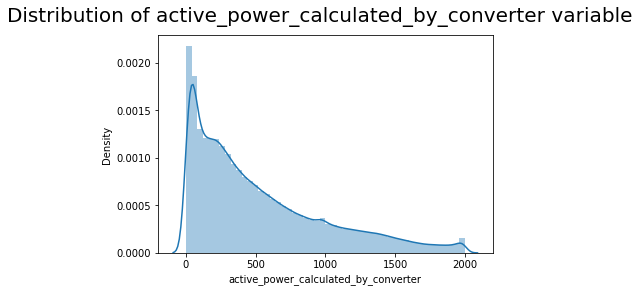

In [10]:
plt.suptitle("Distribution of active_power_calculated_by_converter variable", fontsize=20)
sns.distplot(train["active_power_calculated_by_converter"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='active_power_raw', ylabel='Density'>

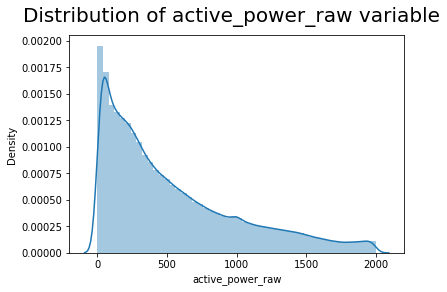

In [11]:
plt.suptitle("Distribution of active_power_raw variable", fontsize=20)
sns.distplot(train["active_power_raw"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ambient_temperature', ylabel='Density'>

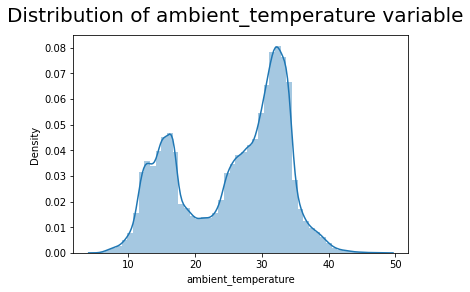

In [12]:
plt.suptitle("Distribution of ambient_temperature variable", fontsize=20)
sns.distplot(train["ambient_temperature"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='generator_speed', ylabel='Density'>

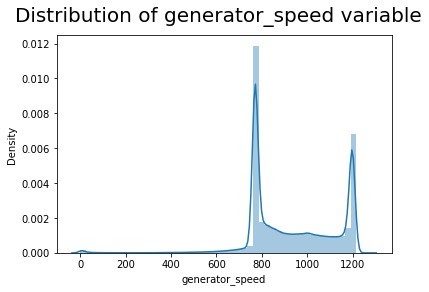

In [13]:
plt.suptitle("Distribution of generator_speed variable", fontsize=20)
sns.distplot(train["generator_speed"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='generator_winding_temp_max', ylabel='Density'>

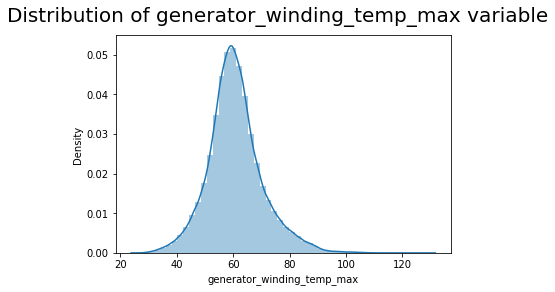

In [14]:
plt.suptitle("Distribution of generator_winding_temp_max variable", fontsize=20)
sns.distplot(train["generator_winding_temp_max"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='grid_power10min_average', ylabel='Density'>

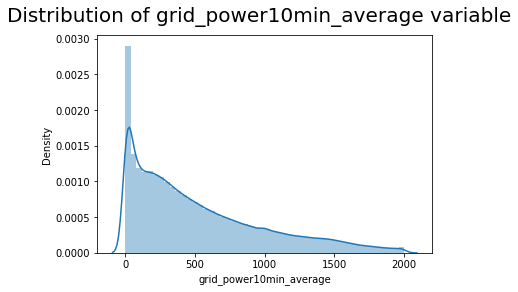

In [15]:
plt.suptitle("Distribution of grid_power10min_average variable", fontsize=20)
sns.distplot(train["grid_power10min_average"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nc1_inside_temp', ylabel='Density'>

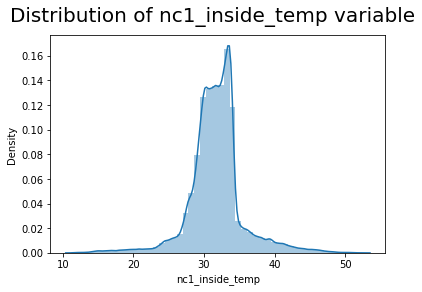

In [16]:
plt.suptitle("Distribution of nc1_inside_temp variable", fontsize=20)
sns.distplot(train["nc1_inside_temp"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nacelle_temp', ylabel='Density'>

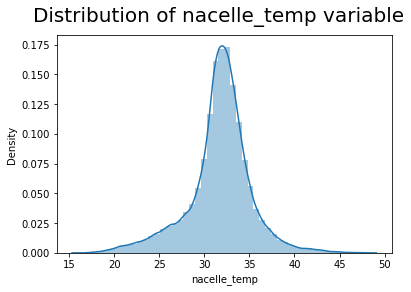

In [17]:
plt.suptitle("Distribution of nacelle_temp variable", fontsize=20)
sns.distplot(train["nacelle_temp"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reactice_power_calculated_by_converter', ylabel='Density'>

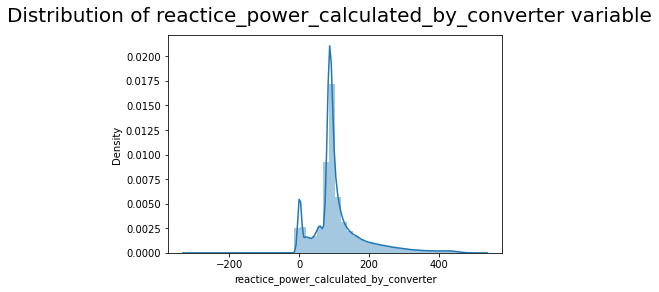

In [18]:
plt.suptitle("Distribution of reactice_power_calculated_by_converter variable", fontsize=20)
sns.distplot(train["reactice_power_calculated_by_converter"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reactive_power', ylabel='Density'>

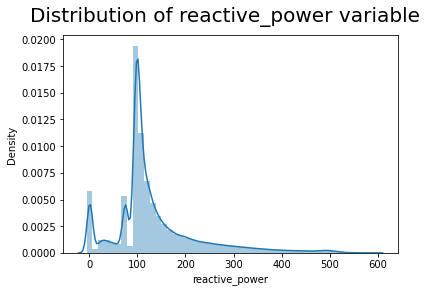

In [19]:
plt.suptitle("Distribution of reactive_power variable", fontsize=20)
sns.distplot(train["reactive_power"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind_direction_raw', ylabel='Density'>

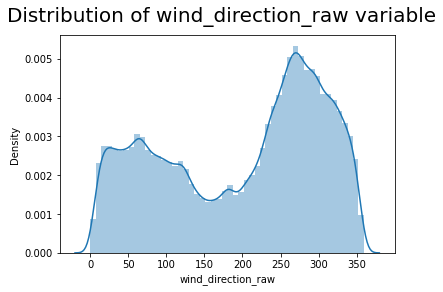

In [20]:
plt.suptitle("Distribution of wind_direction_raw variable", fontsize=20)
sns.distplot(train["wind_direction_raw"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind_speed_raw', ylabel='Density'>

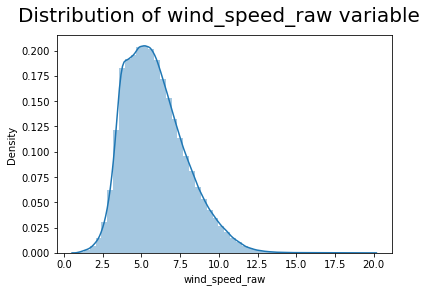

In [21]:
plt.suptitle("Distribution of wind_speed_raw variable", fontsize=20)
sns.distplot(train["wind_speed_raw"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind_speed_turbulence', ylabel='Density'>

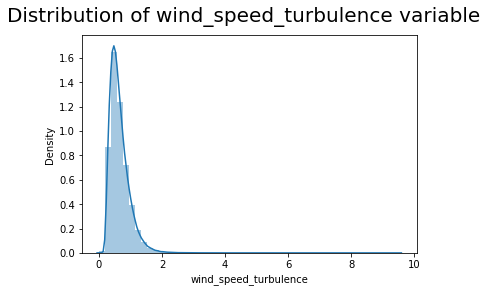

In [22]:
plt.suptitle("Distribution of wind_speed_turbulence variable", fontsize=20)
sns.distplot(train["wind_speed_turbulence"])

<AxesSubplot:xlabel='count', ylabel='turbine_id'>

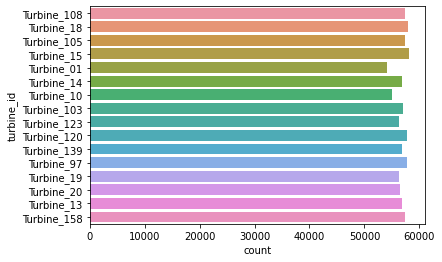

In [23]:
sns.countplot(y = train['turbine_id'])

# Multi-variate Analysis

<AxesSubplot:>

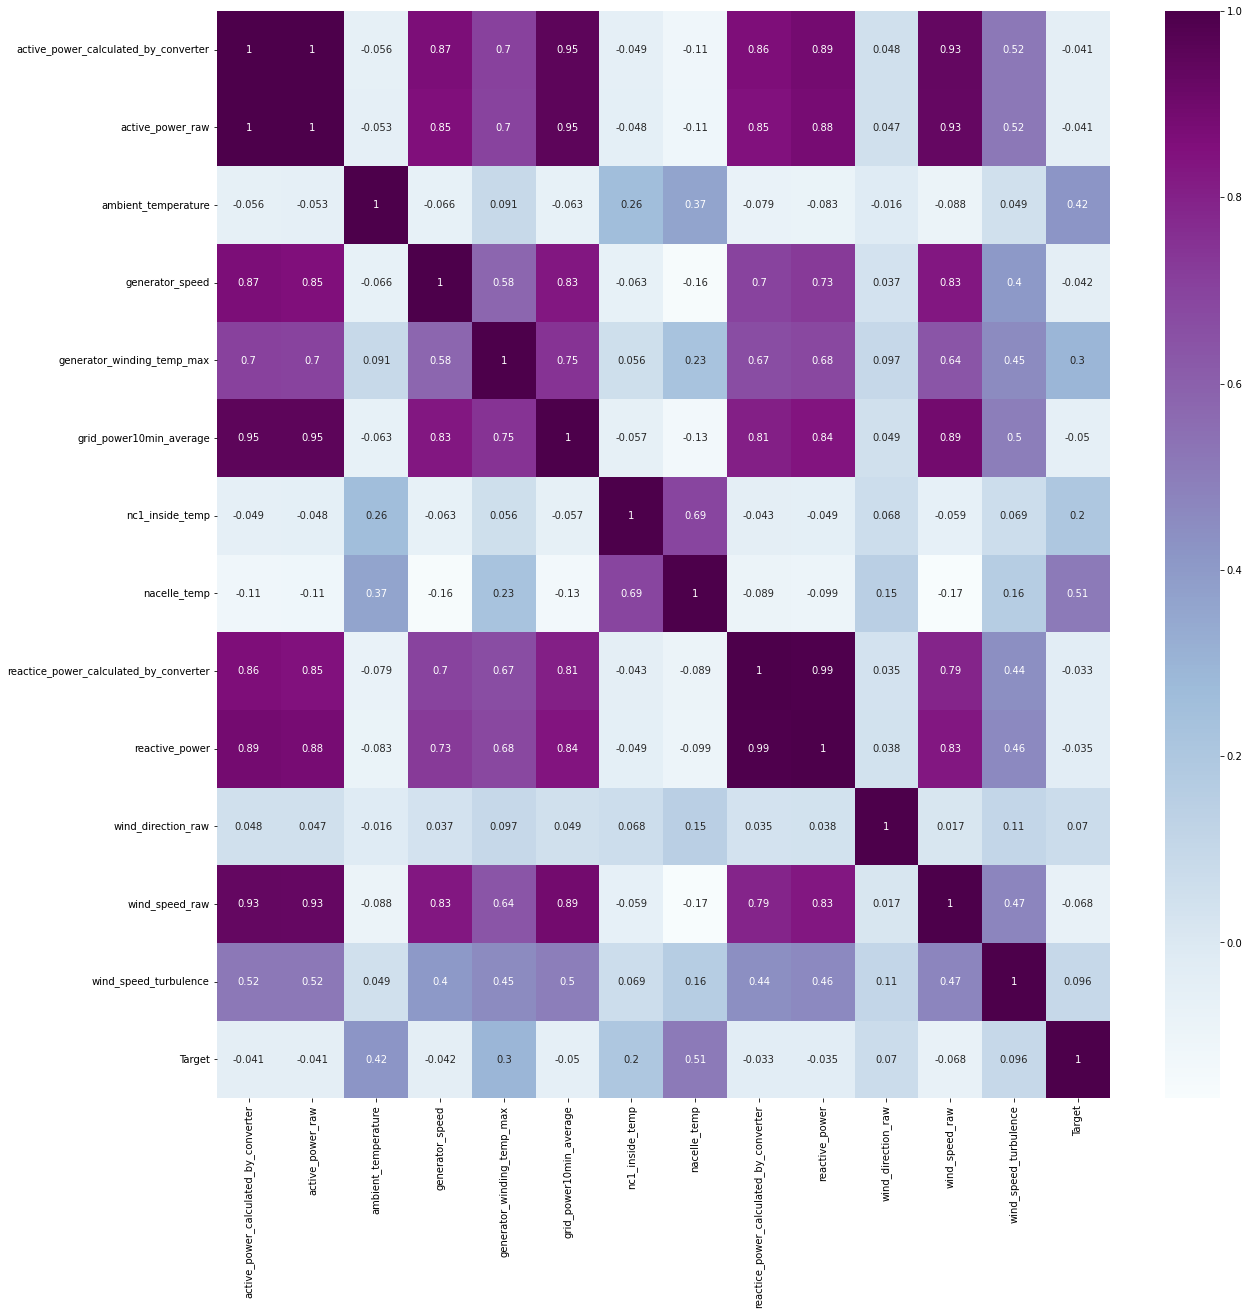

In [24]:
sns.color_palette("crest", as_cmap=True)
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), annot = True, cmap="BuPu")

In [25]:
train.columns

Index(['timestamp', 'active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

#### Correlation Analysis
Above we can see that the 'active_power_calculated_by_converter' and the 'active_power_raw' are exactly same. So we can remove one of them. <br> Also the 'reactice_power_calculated_by_converter' and 'reactive_power' are highly correlated. So we can remove one of them.<br> Let's remove the 'active_power_raw' and 'reactive_power' columns.

Also the following features are a good predictor of the 'Target', as they have a high correlation with the target.<br>
<uL>
<li>nacelle_temp [0.51]</li>
<li>ambient_temperature [0.42]</li>
<li>generator_winding_temp_max [0.3]</li>
<li>nc1_inside_temp [0.2]</li>
</ul><br>
So we might want to think about how we can do some feature engineering on these columns.

# Corelated Features Distribution Analysis

<AxesSubplot:xlabel='active_power_calculated_by_converter', ylabel='Density'>

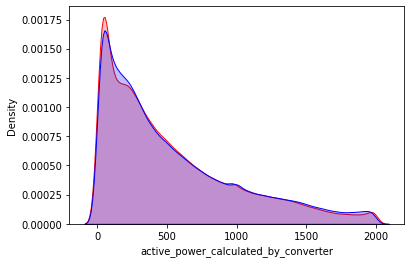

In [26]:
sns.kdeplot(train["active_power_calculated_by_converter"], shade=True, color="r")
sns.kdeplot(train["active_power_raw"], shade=True, color="b")

<AxesSubplot:xlabel='reactice_power_calculated_by_converter', ylabel='Density'>

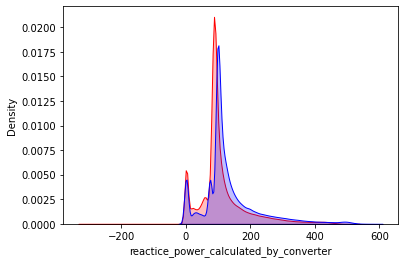

In [33]:
sns.kdeplot(train["reactice_power_calculated_by_converter"], shade=True, color="r")
sns.kdeplot(train["reactive_power"], shade=True, color="b")

In [35]:
print(train["reactice_power_calculated_by_converter"].max())
print(train["reactive_power"].max())
print(train["active_power_calculated_by_converter"].max())
print(train["active_power_raw"].max())

523.892695109049
592.815938313802
1999.99985758464
1999.9844563802103


In [37]:
train["reactive_power_diff"] = train["reactive_power"] - train["reactice_power_calculated_by_converter"]
train["active_power_diff"] = train["active_power_raw"] - train["active_power_calculated_by_converter"]

# Target Analysis

In [42]:
train.Target

0         47.582787
1         46.070328
2         39.989236
3         46.056587
4         54.346095
            ...    
909599    50.768675
909600    44.234821
909601    46.942486
909602    46.392221
909603    48.902180
Name: Target, Length: 909604, dtype: float64

<AxesSubplot:xlabel='Target', ylabel='Density'>

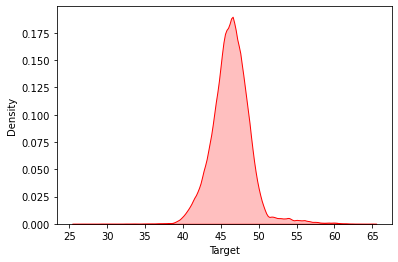

In [43]:
sns.kdeplot(train["Target"], shade=True, color="r")